In [44]:
%matplotlib inline

Using matplotlib backend: Qt5Agg



# Watershed segmentation


The watershed is a classical algorithm used for **segmentation**, that
is, for separating different objects in an image.

Starting from user-defined markers, the watershed algorithm treats
pixels values as a local topography (elevation). The algorithm floods
basins from the markers, until basins attributed to different markers
meet on watershed lines.  In many cases, markers are chosen as local
minima of the image, from which basins are flooded.

In the example below, two overlapping circles are to be separated. To
do so, one computes an image that is the distance to the
background. The maxima of this distance (i.e., the minima of the
opposite of the distance) are chosen as markers, and the flooding of
basins from such markers separates the two circles along a watershed
line.





<b>codigo da biblioteca scikit</b> 
com algumas modificações minimas


In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

import cv2

from skimage.morphology import watershed
from skimage.feature import peak_local_max

from skimage import data



In [46]:
import PyQt5
import matplotlib
matplotlib.use('qt5agg')
import matplotlib.pyplot as plt



In [47]:
# Generate an initial image with two overlapping circles
x, y = np.indices((80, 80))
x1, y1, x2, y2 = 28, 28, 44, 52
r1, r2 = 16, 20
mask_circle1 = (x - x1)**2 + (y - y1)**2 < r1**2
mask_circle2 = (x - x2)**2 + (y - y2)**2 < r2**2
image = np.logical_or(mask_circle1, mask_circle2)

plt.show()
plt.savefig('water_o')

<Figure size 432x288 with 0 Axes>

In [48]:
#utilizando a imagem coins para comparar com a resposta do whatershed OpenCV
image = data.coins() 


plt.show()
plt.savefig('water_coins')

<Figure size 432x288 with 0 Axes>

<class 'matplotlib.figure.Figure'>


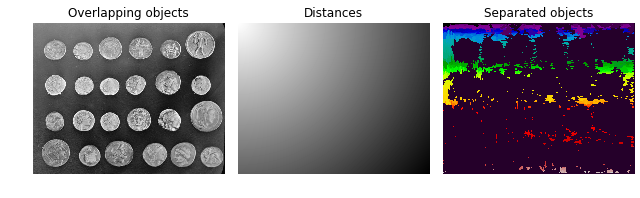

In [49]:
# Now we want to separate the two objects in image
# Generate the markers as local maxima of the distance to the background
distance = ndi.distance_transform_edt(image)
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)),
                            labels=image)
markers = ndi.label(local_maxi)[0]
labels = watershed(-distance, markers, mask=image)

fig, axes = plt.subplots(ncols=3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_title('Overlapping objects')
ax[1].imshow(-distance, cmap=plt.cm.gray, interpolation='nearest')
ax[1].set_title('Distances')
ax[2].imshow(labels, cmap=plt.cm.nipy_spectral, interpolation='nearest')
ax[2].set_title('Separated objects')

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()
plt.savefig('water1.png', bbox_inches='tight')

print(type(fig))